In [168]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [169]:
names = { 'Have you seen any of the 6 films in the Star Wars franchise?':'seen', 
         'Do you consider yourself to be a fan of the Star Wars film franchise?':'fan',
         'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦':'expand_fan',
         'Are you familiar with the Expanded Universe?':'seen_expanded',
         'Which of the following Star Wars films have you seen? Please select all that apply.':"seen_1",
         "Unnamed: 4":"seen_2",
         "Unnamed: 5":"seen_3",
         "Unnamed: 6":"seen_4",
         "Unnamed: 7":"seen_5",
         "Unnamed: 8":"seen_6",
         "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"rank_1",
         "Unnamed: 10":"rank_2",
         "Unnamed: 11":"rank_3",
         "Unnamed: 12":"rank_4",
         "Unnamed: 13":"rank_5",
         "Unnamed: 14":"rank_6",
         "Do you consider yourself to be a fan of the Star Trek franchise?":"star_track_fan",
        }

star_wars.rename(columns = names, inplace = True)
print(star_wars.columns)

Index(['RespondentID', 'seen', 'fan', 'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Which character shot first?', 'seen_expanded', 'expand_fan', 'star_track_fan', 'Gender', 'Age', 'Household Income', 'Education', 'Location (Census Region)'], dtype='object')


In [170]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [171]:
bool_converter = {'Yes':True, 'No':False}
star_wars['seen'] = star_wars['seen'].map(bool_converter)
star_wars['fan'] = star_wars['fan'].map(bool_converter)
star_wars['star_track_fan'] = star_wars['star_track_fan'].map(bool_converter)

In [172]:
import numpy as np

In [173]:
def rename_bool_filed(name, column_name):
    name_to_seen = {name: True, np.nan:False}
    star_wars[column_name] = star_wars[column_name].map(name_to_seen)

In [174]:
rename_bool_filed('Star Wars: Episode I  The Phantom Menace', 'seen_1')
rename_bool_filed('Star Wars: Episode II  Attack of the Clones', 'seen_2')
rename_bool_filed('Star Wars: Episode III  Revenge of the Sith', 'seen_3')
rename_bool_filed('Star Wars: Episode IV  A New Hope', 'seen_4')
rename_bool_filed('Star Wars: Episode V The Empire Strikes Back', 'seen_5')
rename_bool_filed('Star Wars: Episode VI Return of the Jedi', 'seen_6')

In [175]:
#print(star_wars.columns[9:15].value_counts)
#print(star_wars.ix[:5, 9:15])
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [176]:
def mean_seen(column):
    total = column.shape[0]
    yes = column.sum()
    return yes/total

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

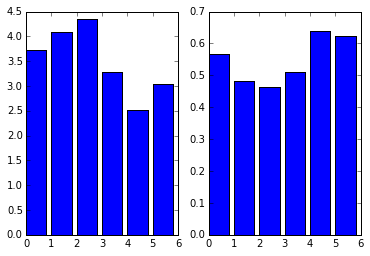

In [178]:
fig, (ax, bx) = plt.subplots(1, 2)
rank_mean = ax.bar(range(6), star_wars.ix[:, 9:15].mean())
seen_mean_data = [mean_seen(star_wars.ix[:,x]) for x in range(3, 9)]
seen_mean = bx.bar(range(6), seen_mean_data )
plt.show()

the 5th movie is the most popular, because it was one of the first movie people had seen, so it looks very good, with compare to others.s

it looks like people haven't see much the 3 and 2 movies

In [179]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
fan = star_wars[star_wars["fan"] == True]
non_fan = star_wars[star_wars["fan"] == False]
track_fan = star_wars[star_wars['star_track_fan'] == True]
track_not_fan = star_wars[star_wars['star_track_fan'] == False]

In [183]:
def show_comparing_plot(data_1, data_2):
    fig, (ax, bx) = plt.subplots(1, 2)
    N = 6
    range_1 = range(N)
    range_2 = [x + 0.5 for x in range(N)]
    rank_mean_1 = ax.bar(range_1, data_1.ix[:, 9:15].mean(), color = 'b')
    rank_mean_2 = ax.bar(range_2, data_2.ix[:, 9:15].mean(), color = 'r')
    seen_mean_data_1 = [mean_seen(data_1.ix[:,x]) for x in range(3, 9)]
    seen_mean_data_2 = [mean_seen(data_2.ix[:,x]) for x in range(3, 9)]
    seen_mean_1 = bx.bar(range_1, seen_mean_data_1, color = 'b')
    seen_mean_2 = bx.bar(range_2, seen_mean_data_2, color = 'r')
    plt.show()   

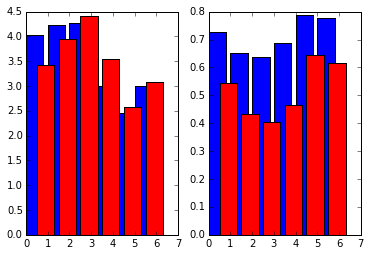

In [185]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
show_comparing_plot(males, females)

There is no big difference between male/female results, except the fact, that women are less likely to watch this films.
Only big differens in 4 movie. Women likes it less

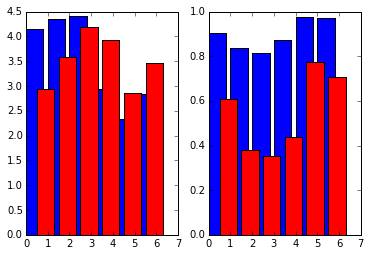

In [186]:
show_comparing_plot(fan, non_fan)

Fan and non fan likes or rate movies very similar, except 4 movie. Non fans don't like it much more, than fans does.

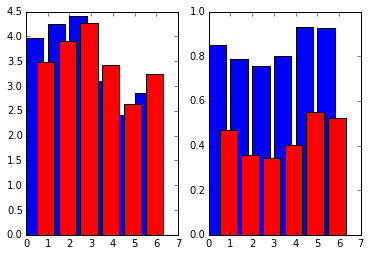

In [187]:
show_comparing_plot(track_fan, track_not_fan)

It shows us, that tastes for Star Track fans and Star Wars fans are very similar